In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from datetime import datetime, timedelta

In [14]:
# Carregando os dados
df = pd.read_csv("data.csv.txt")
df.head()


df.index = pd.to_datetime(df.Data, infer_datetime_format=True)
df.drop("Data", 1, inplace=True)

#Selecionando apenas coluca de "Total Confirmados"

df = df[["Total Confirmados"]]

#Renomeando a coluna para "total"
df.colums = ["total"]

#visualizando as 5 primeiras linhas do conjunto de dados
df.head()

,Total Confirmados
Data,
2020-03-16,1
2020-03-17,1
2020-03-18,3
2020-03-19,3
2020-03-20,3


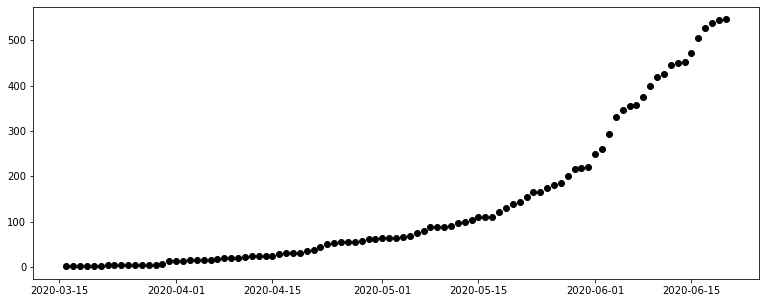

In [18]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(
    df["Total Confirmados"].index,
    df["Total Confirmados"].values,
    color="black"
)
plt.show()

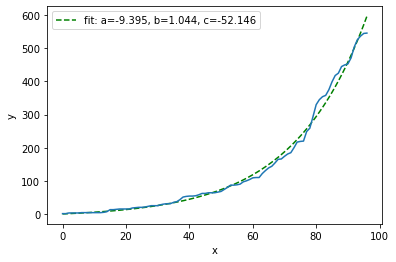

In [19]:

# funcão exponecial com parâmetros a, b e c
def exp_func(X, a, b, c):
    y = a + b**(X-c)
    return y

# otimização usando scipy
popt, pcov = optimize.curve_fit(exp_func, np.arange(len(df["Total Confirmados"])), df["Total Confirmados"].values)

# gráfico
plt.plot(np.arange(len(df["Total Confirmados"])), exp_func(np.arange(len(df["Total Confirmados"])), *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(np.arange(len(df["Total Confirmados"])), df["Total Confirmados"].values)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [21]:
# criando função pra converter data em dias
def data_to_days(date):
    x = (date - df.index[-1]).days + len(df['Total Confirmados'])
    return x

# criando o modelo usando os parâmetros ajustados
def exp_model(X):
    X = data_to_days(X)
    y = -9.395 + 1.044 ** (X - (-52.146))
    return int(y)

tomorrow = datetime.today() + timedelta(days=1)
after_tomorrow = datetime.today() + timedelta(days=2)

print("Amanhã:", exp_model(tomorrow))
print("Depois de amanhã:", exp_model(after_tomorrow))

Amanhã: 257059973951
Depois de amanhã: 268370612806
